<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [24]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if len(X) != len(V):
        raise ValueError("Количество матриц и векторов не совпадает")
    if len(X) == 0:
        return np.array([])
    
    result = np.zeros_like(V[0])
    for mat, vec in zip(X, V):
        result += np.dot(mat, vec)
    return result

def test_sum_prod():
    # Тест 1: Проверка правильности вычислений
    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    expected1 = np.array([[5], [11]])
    assert np.array_equal(sum_prod(X1, V1), expected1), "Тест 1 не пройден"

    # Тест 2: Несколько матриц и векторов
    X2 = [
        np.array([[1, 0], [0, 1]]),
        np.array([[2, 0], [0, 2]]),
        np.array([[0, 1], [1, 0]])
    ]
    V2 = [
        np.array([[1], [0]]),
        np.array([[0], [1]]),
        np.array([[1], [1]])
    ]
    expected2 = np.array([[2], [3]])
    assert np.array_equal(sum_prod(X2, V2), expected2), "Тест 2 не пройден"

    # Тест 3: Пустые входные данные
    X3 = []
    V3 = []
    expected3 = np.array([])
    assert np.array_equal(sum_prod(X3, V3), expected3), "Тест 3 не пройден"

    # Тест 4: Проверка на исключение при несовпадении размеров
    X4 = [np.array([[1, 2], [3, 4]])]
    V4 = [np.array([[1], [2]]), np.array([[3], [4]])]  # Лишний вектор
    try:
        sum_prod(X4, V4)
        assert False, "Тест 4 не пройден: исключение не было вызвано"
    except ValueError:
        pass  # Ожидаемое поведение

    # Тест 5: Одномерные векторы и матрицы 1x1
    X5 = [np.array([[2]])]
    V5 = [np.array([[3]])]
    expected5 = np.array([[6]])
    assert np.array_equal(sum_prod(X5, V5), expected5), "Тест 5 не пройден"

    print("Все тесты пройдены успешно!")

# Запуск тестов
test_sum_prod()

Все тесты пройдены успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [57]:
def binarize(M, threshold=0.5):
    return(M > threshold).astype(int)

# Тест 1: Порог по умолчанию (0.5)
M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
expected1 = np.array([[0, 1], [0, 1]])
assert np.array_equal(binarize(M1), expected1), "Позитивный тест 1 не пройден"

# Тест 2: Пользовательский порог (0.3)
M2 = np.array([[0.4, 0.5], [0.6, 0.7]])
expected2 = np.array([[1, 1], [1, 1]])
assert np.array_equal(binarize(M2, threshold=0.3), expected2), "Позитивный тест 2 не пройден"

# Тест 3: Все элементы ниже порога (0.8)
M3 = np.array([[0.1, 0.2], [0.3, 0.7]])
expected3 = np.array([[0, 0], [0, 0]])
assert np.array_equal(binarize(M3, threshold=0.8), expected3), "Позитивный тест 3 не пройден"

# Тест 4: Порог равен 0
M4 = np.array([[0.0, 0.1], [-0.1, 0.2]])
expected4 = np.array([[0, 1], [0, 1]])
assert np.array_equal(binarize(M4, threshold=0.0), expected4), "Позитивный тест 4 не пройден"

# --- Негативные тесты ---
# Тест 5: Не-NumPy матрица (обычный список)
try:
    binarize([[0.1, 0.2], [0.3, 0.4]])
    assert False, "Негативный тест 5 не пройден: ожидалась ошибка TypeError"
except (AttributeError, TypeError):
    pass  # Ожидаемое поведение

# Тест 6: Порог — строка вместо числа
try:
    binarize(np.array([[0.1, 0.2]]), threshold="0.5")
    assert False, "Негативный тест 6 не пройден: ожидалась ошибка TypeError"
except TypeError:
    pass  # Ожидаемое поведение

# Тест 7: Пустая матрица
assert np.array_equal(binarize(np.array([])), np.array([])), "Негативный тест 7 не пройден"

print("Все тесты прошли успешно!")

Все тесты прошли успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [105]:
def unique_rows(mat):
    rows = []
    for row in mat:
        unique_in_row = np.unique(row).tolist()
        rows.append(unique_in_row)
    return rows

def unique_columns(mat):
    columns = []
    for col in mat.T:
        unique_in_col = np.unique(col).tolist()
        columns.append(unique_in_col)
    return columns

# Тесты для unique_rows
def test_unique_rows():
    # Матрица без повторяющихся элементов в строках
    mat1 = np.array([[1, 2, 3], [4, 5, 6]])
    assert unique_rows(mat1) == [[1, 2, 3], [4, 5, 6]]

    # Матрица с повторяющимися элементами в строках
    mat2 = np.array([[1, 2, 2], [3, 3, 3]])
    assert unique_rows(mat2) == [[1, 2], [3]]

    # Пустая матрица
    mat3 = np.array([]).reshape(0, 0)
    assert unique_rows(mat3) == []

    # Матрица с одной строкой
    mat4 = np.array([[5, 5, 5, 5]])
    assert unique_rows(mat4) == [[5]]

    # Матрица с одним элементом
    mat5 = np.array([[7]])
    assert unique_rows(mat5) == [[7]]

# Тесты для unique_columns
def test_unique_columns():
    # Матрица без повторяющихся элементов в столбцах
    mat1 = np.array([[1, 4], [2, 5], [3, 6]])
    assert unique_columns(mat1) == [[1, 2, 3], [4, 5, 6]]

    # Матрица с повторяющимися элементами в столбцах
    mat2 = np.array([[1, 3], [1, 3], [1, 3]])
    assert unique_columns(mat2) == [[1], [3]]

    # Пустая матрица
    mat3 = np.array([]).reshape(0, 0)
    assert unique_columns(mat3) == []

    # Матрица с одним столбцом
    mat4 = np.array([[5], [5], [5]])
    assert unique_columns(mat4) == [[5]]

    # Матрица с одним элементом
    mat5 = np.array([[7]])
    assert unique_columns(mat5) == [[7]]

# Запуск тестов
test_unique_rows()
test_unique_columns()

print("Все тесты прошли успешно!")

Все тесты прошли успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

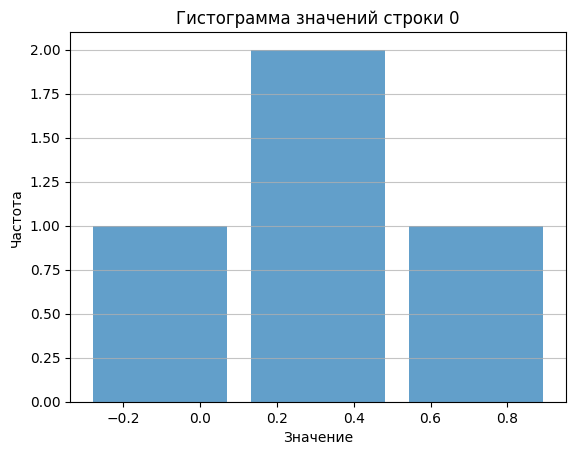

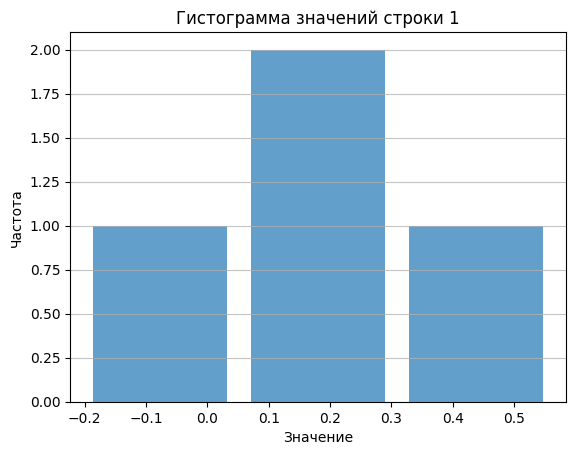

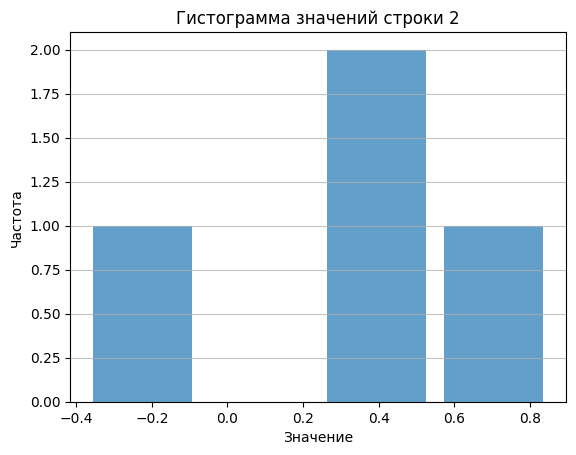

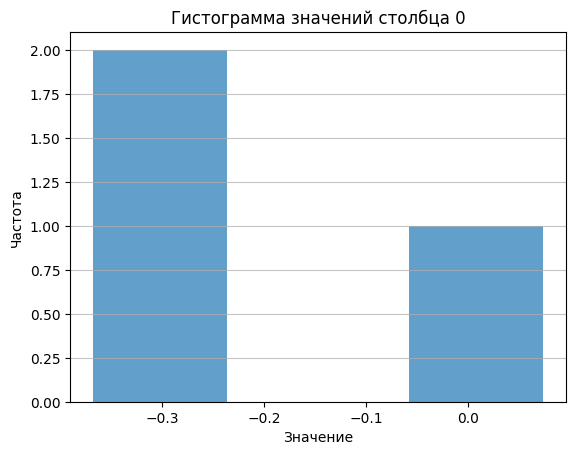

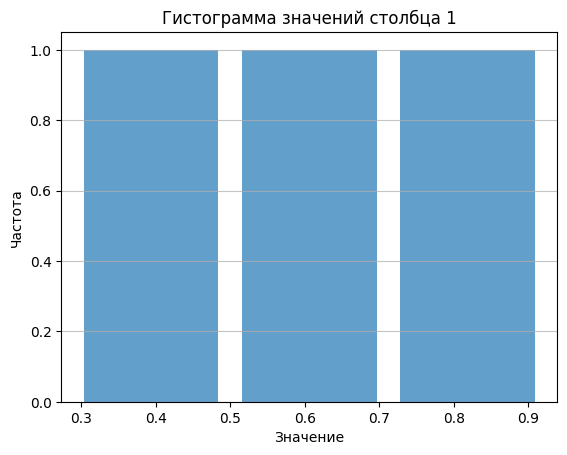

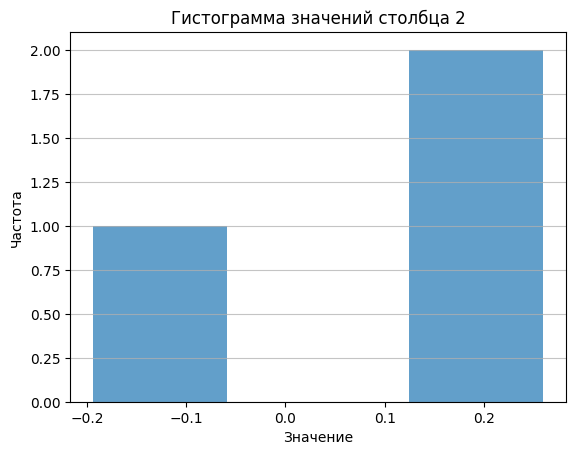

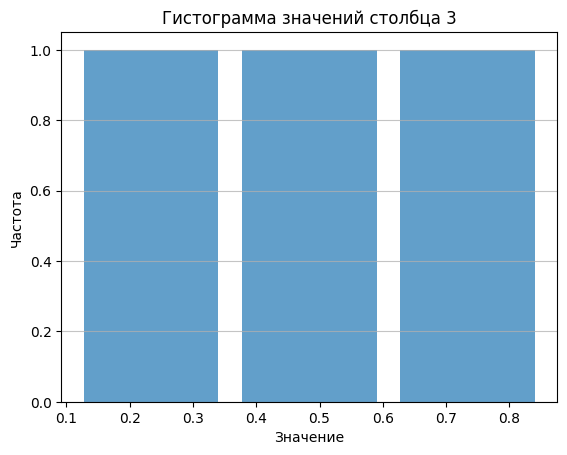

Все тесты прошли успешно!


In [106]:
def normal_distribution_matrix_stats(m, n):
    """
    Функция создает матрицу размера (m, n) с нормально распределенными числами,
    вычисляет мат. ожидание и дисперсию для строк и столбцов,
    а также строит гистограммы для каждой строки и столбца.

    Параметры:
    m (int): количество строк
    n (int): количество столбцов

    Возвращает:
    tuple: (row_means, row_variances, col_means, col_variances)
    """
    # Создаем матрицу с нормально распределенными числами
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))

    # Вычисляем мат. ожидание и дисперсию для строк
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    # Вычисляем мат. ожидание и дисперсию для столбцов
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    # Строим гистограммы для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins='auto', alpha=0.7, rwidth=0.85)
        plt.title(f'Гистограмма значений строки {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    # Строим гистограммы для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins='auto', alpha=0.7, rwidth=0.85)
        plt.title(f'Гистограмма значений столбца {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    return row_means, row_variances, col_means, col_variances


def test_normal_distribution_matrix_stats():
    """Тесты для функции normal_distribution_matrix_stats."""
    m, n = 3, 4
    row_means, row_variances, col_means, col_variances = normal_distribution_matrix_stats(m, n)

    # Проверяем, что размерности выходных данных верны
    assert len(row_means) == m, "Неверное количество мат. ожиданий строк"
    assert len(row_variances) == m, "Неверное количество дисперсий строк"
    assert len(col_means) == n, "Неверное количество мат. ожиданий столбцов"
    assert len(col_variances) == n, "Неверное количество дисперсий столбцов"

    # Проверяем, что мат. ожидания и дисперсии являются числами (не NaN и не Infinity)
    assert all(np.isfinite(row_means)), "Найдены нечисловые значения в мат. ожиданиях строк"
    assert all(np.isfinite(row_variances)), "Найдены нечисловые значения в дисперсиях строк"
    assert all(np.isfinite(col_means)), "Найдены нечисловые значения в мат. ожиданиях столбцов"
    assert all(np.isfinite(col_variances)), "Найдены нечисловые значения в дисперсиях столбцов"

    # Проверяем, что дисперсии неотрицательные
    assert all(var >= 0 for var in row_variances), "Найдены отрицательные дисперсии строк"
    assert all(var >= 0 for var in col_variances), "Найдены отрицательные дисперсии столбцов"

    print("Все тесты прошли успешно!")


# Запускаем тесты
test_normal_distribution_matrix_stats()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [107]:
def chess(m, n, a, b):
    matrix = [[a for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 1:
                matrix[i][j] = b
    return matrix

# Тесты
def test_chess():
    # Тест 1: Матрица 2x2
    assert chess(2, 2, 0, 1) == [[0, 1], [1, 0]]
    
    # Тест 2: Матрица 3x3
    assert chess(3, 3, 'a', 'b') == [
        ['a', 'b', 'a'],
        ['b', 'a', 'b'],
        ['a', 'b', 'a']
    ]
    
    # Тест 3: Матрица 1x1 (должна вернуть только 'a')
    assert chess(1, 1, 10, 20) == [[10]]
    
    # Тест 4: Матрица 2x3
    assert chess(2, 3, True, False) == [
        [True, False, True],
        [False, True, False]
    ]
    
    # Тест 5: Матрица 0x0 (пустая)
    assert chess(0, 0, 'x', 'y') == []
    
    print("Все тесты прошли успешно!")

test_chess()

Все тесты прошли успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [108]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Рисует прямоугольник с размерами a x b на изображении m x n.
    Прямоугольник центрируется на изображении.
    
    Параметры:
        a (int): высота прямоугольника в пикселях
        b (int): ширина прямоугольника в пикселях  
        m (int): высота изображения
        n (int): ширина изображения
        rectangle_color (tuple): цвет прямоугольника в формате RGB (R, G, B)
        background_color (tuple): цвет фона в формате RGB (R, G, B)
    
    Возвращает:
        numpy.ndarray: изображение с прямоугольником размером m x n x 3
    """
    # Создаем изображение, заполненное цветом фона
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # Проверяем валидность входных параметров
    if a <= 0 or b <= 0 or m <= 0 or n <= 0:
        return image
    
    # Вычисляем начальные координаты прямоугольника (левый верхний угол)
    y_start = (m - a) // 2  # Центрирование по вертикали
    x_start = (n - b) // 2  # Центрирование по горизонтали
    
    # Корректируем координаты, чтобы не выйти за границы изображения
    y_start = max(0, y_start)
    x_start = max(0, x_start)
    y_end = min(m, y_start + a)  # Нижняя граница
    x_end = min(n, x_start + b)  # Правая граница
    
    # Закрашиваем прямоугольник заданным цветом
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Рисует эллипс с полуосями a и b на изображении m x n.
    Эллипс центрируется на изображении.
    
    Параметры:
        a (int): вертикальная полуось эллипса
        b (int): горизонтальная полуось эллипса
        m (int): высота изображения
        n (int): ширина изображения
        ellipse_color (tuple): цвет эллипса в формате RGB (R, G, B)
        background_color (tuple): цвет фона в формате RGB (R, G, B)
    
    Возвращает:
        numpy.ndarray: изображение с эллипсом размером m x n x 3
    """
    # Создаем изображение, заполненное цветом фона
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # Проверяем валидность входных параметров
    if a <= 0 or b <= 0 or m <= 0 or n <= 0:
        return image
    
    # Создаем сетку координат для всех пикселей изображения
    y, x = np.ogrid[:m, :n]
    center_y, center_x = m // 2, n // 2  # Центр изображения
    
    # Уравнение эллипса: ((x - center_x)/b)^2 + ((y - center_y)/a)^2 <= 1
    # Создаем маску, где True - пиксели внутри эллипса
    mask = ((x - center_x)**2 / b**2 + (y - center_y)**2 / a**2) <= 1
    
    # Закрашиваем пиксели внутри эллипса заданным цветом
    image[mask] = ellipse_color
    
    return image

# Тестовые функции
def test_draw_rectangle():
    """Тестирование функции draw_rectangle"""
    # Тест 1: Обычный прямоугольник
    result = draw_rectangle(2, 3, 4, 5, (255, 0, 0), (0, 0, 0))
    expected = np.array([
        [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [255, 0, 0], [255, 0, 0], [255, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    ], dtype=np.uint8)
    assert np.array_equal(result, expected), "Тест 1 не пройден"
    
    # Тест 2: Прямоугольник больше изображения
    result = draw_rectangle(5, 5, 3, 3, (0, 255, 0), (0, 0, 0))
    expected = np.full((3, 3, 3), (0, 255, 0), dtype=np.uint8)
    assert np.array_equal(result, expected), "Тест 2 не пройден"
    
    # Тест 3: Нулевые размеры
    result = draw_rectangle(0, 3, 4, 5, (0, 0, 255), (255, 255, 255))
    expected = np.full((4, 5, 3), (255, 255, 255), dtype=np.uint8)
    assert np.array_equal(result, expected), "Тест 3 не пройден"
    
    print("Все тесты для прямоугольника пройдены!")

def test_draw_ellipse():
    """Тестирование функции draw_ellipse"""
    # Тест 1: Проверка центра и угла эллипса
    result = draw_ellipse(2, 3, 5, 7, (255, 0, 0), (0, 0, 0))
    assert np.array_equal(result[2, 3], [255, 0, 0]), "Тест 1: центр не совпадает"
    assert np.array_equal(result[0, 0], [0, 0, 0]), "Тест 1: угол не совпадает"
    
    # Тест 2: Круг (когда полуоси равны)
    result = draw_ellipse(2, 2, 5, 5, (0, 255, 0), (0, 0, 0))
    assert np.array_equal(result[2, 2], [0, 255, 0]), "Тест 2: центр не совпадает"
    assert np.array_equal(result[0, 0], [0, 0, 0]), "Тест 2: угол не совпадает"
    assert np.array_equal(result[1, 1], [0, 255, 0]), "Тест 2: граница не совпадает"
    
    # Тест 3: Нулевые размеры
    result = draw_ellipse(0, 3, 4, 5, (0, 0, 255), (255, 255, 255))
    expected = np.full((4, 5, 3), (255, 255, 255), dtype=np.uint8)
    assert np.array_equal(result, expected), "Тест 3 не пройден"
    
    print("Все тесты для эллипса пройдены!")

# Запускаем тесты
test_draw_rectangle()
test_draw_ellipse()

Все тесты для прямоугольника пройдены!
Все тесты для эллипса пройдены!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [110]:
import numpy as np

def calculate_mean(series):
    return np.mean(series)

def calculate_variance(series):
    return np.var(series)

def calculate_std(series):
    return np.std(series)

def find_local_extrema(series):
    local_maxima = []
    local_minima = []
    for i in range(1, len(series) - 1):  # Пропускаем границы
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append((i, series[i]))
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append((i, series[i]))
    return local_maxima, local_minima

def moving_average(series, p):
    if p <= 0 or p > len(series):
        raise ValueError("Размер окна p должен составлять от 1 до длины ряда")
    return [np.mean(series[i:i+p]) for i in range(len(series) - p + 1)]

# Тесты
def test_calculations():
    series = [1, 2, 3, 4, 5]
    assert calculate_mean(series) == 3.0
    assert calculate_variance(series) == 2.0
    assert calculate_std(series) == np.sqrt(2.0)
    
    series = [10, 20, 30, 40, 50]
    assert calculate_mean(series) == 30.0
    assert calculate_variance(series) == 200.0
    assert calculate_std(series) == np.sqrt(200.0)

def test_local_extrema():
    series = [1, 3, 2, 4, 1]
    local_maxima, local_minima = find_local_extrema(series)
    assert local_maxima == [(1, 3), (3, 4)]
    assert local_minima == [(2, 2)]

    series = [5, 4, 3, 4, 5]
    local_maxima, local_minima = find_local_extrema(series)
    assert local_maxima == []
    assert local_minima == [(2, 3)]

def test_moving_average():
    series = [1, 2, 3, 4, 5]
    assert moving_average(series, 2) == [1.5, 2.5, 3.5, 4.5]
    assert moving_average(series, 3) == [2.0, 3.0, 4.0]
    assert moving_average(series, 1) == [1.0, 2.0, 3.0, 4.0, 5.0]
    
    try:
        moving_average(series, 0)
        assert False, "Expected ValueError for window size 0"
    except ValueError:
        pass
    
    try:
        moving_average(series, 6)
        assert False, "Expected ValueError for window size > len(series)"
    except ValueError:
        pass

if __name__ == "__main__":
    test_calculations()
    test_local_extrema()
    test_moving_average()
    print("Все тесты прошли успешно!")

Все тесты прошли успешно!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [112]:
def one_hot_encoding(labels):
    if not labels:
        return []
    
    unique_labels = sorted(set(labels))
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    num_classes = len(unique_labels)
    
    encoding = []
    for label in labels:
        one_hot = [0] * num_classes
        one_hot[label_to_index[label]] = 1
        encoding.append(one_hot)
    
    return encoding

# Тест 1: Проверка на пустой вход
assert one_hot_encoding([]) == []

# Тест 2: Проверка на один класс
assert one_hot_encoding([0, 0, 0]) == [[1], [1], [1]]

# Тест 3: Проверка на несколько классов
assert one_hot_encoding([0, 1, 2]) == [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

# Тест 4: Проверка на несортированные метки
assert one_hot_encoding([2, 1, 0]) == [[0, 0, 1], [0, 1, 0], [1, 0, 0]]

# Тест 5: Проверка на повторяющиеся метки
assert one_hot_encoding([0, 2, 3, 0]) == [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

# Тест 6: Проверка на отрицательные метки
assert one_hot_encoding([-1, 0, 1]) == [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

# Тест 7: Проверка на большой разброс меток
assert one_hot_encoding([10, 5, 10, 20]) == [[0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]]

print("Все тесты пройдены успешно!")

Все тесты пройдены успешно!
